### 📚 Citation

```bibtex
@misc{tidytuesday,  
  title = {Tidy Tuesday: Big Tech Stock Prices},  
  author = {Evan Gower},  
  url = {https://www.kaggle.com/datasets/evangower/big-tech-stock-prices},  
  year = {2023}  
}

### ⚙️ Setup & Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calmap

from matplotlib.colors import LinearSegmentedColormap

In [60]:
df = pd.read_csv('big_tech_stock_prices.csv', on_bad_lines='skip')

### 🧹 Data Exploration & Cleaning

In [61]:
df.head()

,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [62]:
df.tail()

,stock_symbol,date,open,high,low,close,adj_close,volume
45083,TSLA,2022-12-22,136.000000,136.630005,122.260002,125.349998,125.349998,210090300
45084,TSLA,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
45085,TSLA,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
45086,TSLA,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
45087,TSLA,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300


In [63]:
df.columns

Index(['stock_symbol', 'date', 'open', 'high', 'low', 'close', 'adj_close',
       'volume'],
      dtype='object')

In [64]:
df.shape

(45088, 8)

In [65]:
df.describe()

,open,high,low,close,adj_close,volume
count,45088.000000,45088.000000,45088.000000,45088.000000,45088.000000,4.508800e+04
mean,89.266584,90.369825,88.111930,89.271306,85.209631,5.297813e+07
std,101.626955,103.001073,100.124399,101.592916,100.995967,9.324730e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,5.892000e+05
25%,25.670000,25.930135,25.360001,25.660000,22.076433,9.629425e+06
50%,47.930000,48.459999,47.465000,47.970001,45.377333,2.646315e+07
75%,128.662502,129.848900,127.253945,128.640609,113.672460,5.839768e+07
max,696.280029,700.989990,686.090027,691.690002,691.690002,1.880998e+09


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stock_symbol  45088 non-null  object 
 1   date          45088 non-null  object 
 2   open          45088 non-null  float64
 3   high          45088 non-null  float64
 4   low           45088 non-null  float64
 5   close         45088 non-null  float64
 6   adj_close     45088 non-null  float64
 7   volume        45088 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 2.8+ MB


In [67]:
df.duplicated().sum()

np.int64(0)

In [68]:
df.isna().sum()

stock_symbol    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
dtype: int64

In [69]:
tickers = df['stock_symbol'].unique()
tickers

array(['AAPL', 'ADBE', 'AMZN', 'CRM', 'CSCO', 'GOOGL', 'IBM', 'INTC',
       'META', 'MSFT', 'NFLX', 'NVDA', 'ORCL', 'TSLA'], dtype=object)

In [70]:
df['date'] = pd.to_datetime(df['date'])

### 📊 Data Visualization

In [71]:
# Create filtered DataFrames
stock_dfs = {
    ticker: df[(df["stock_symbol"] == ticker) & (df["date"] >= "2015-01-01")].copy()
    for ticker in tickers
}

# FAANG Stocks
stocks = (
    (stock_dfs["META"], "META", "#3B5998"),
    (stock_dfs["AAPL"], "AAPL", "#FA57C1"),
    (stock_dfs["AMZN"], "AMZN", "#05A0D1"),
    (stock_dfs["NFLX"], "NFLX", "#980A0A"),
    (stock_dfs["GOOGL"], "GOOGL", "#F4B400"),
)

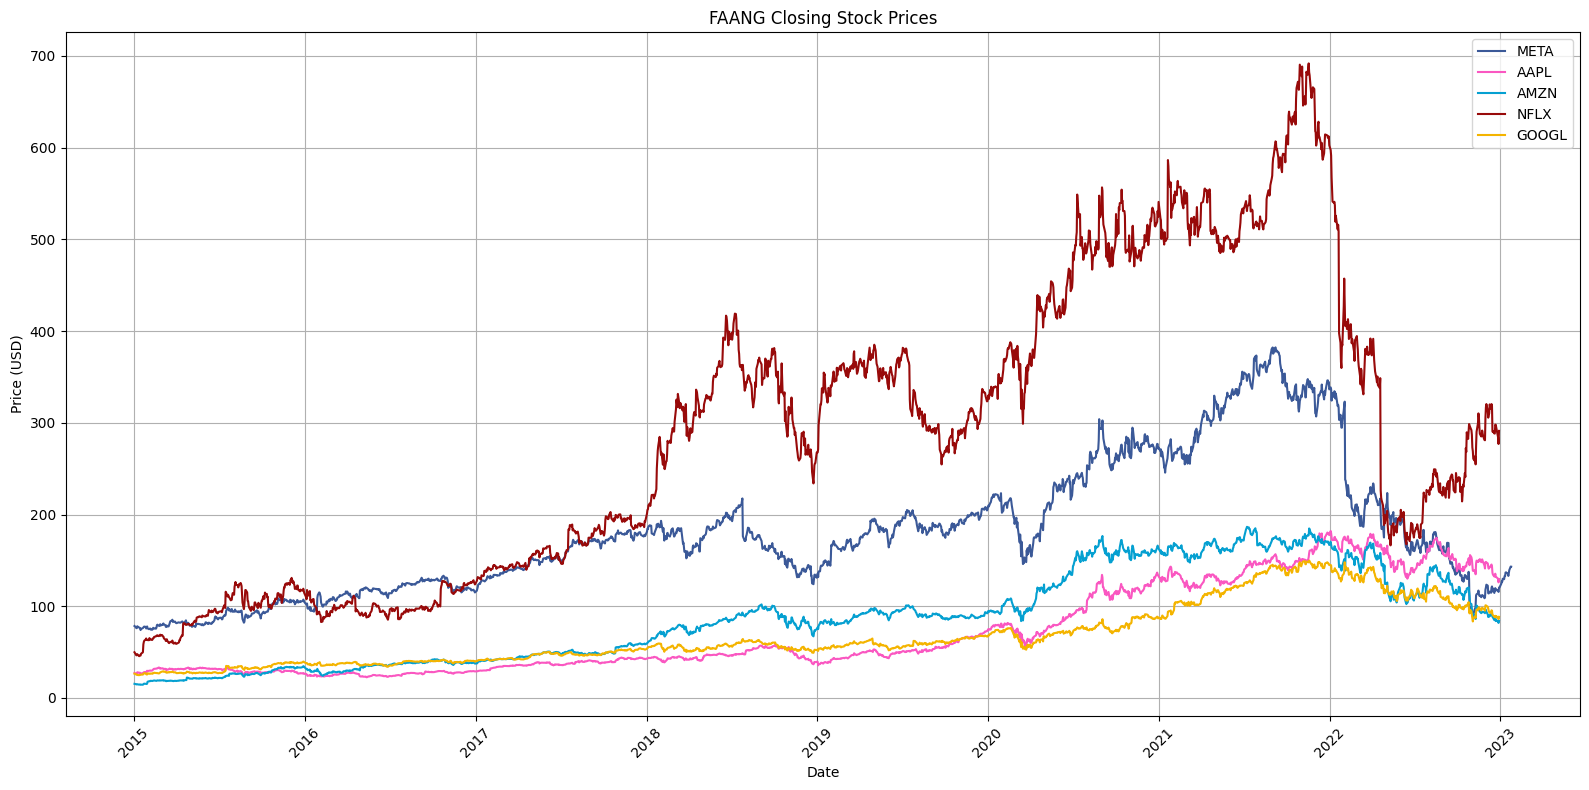

In [72]:
# Comparision of closing prices of FAANG stocks from 2015 onwards
plt.figure(figsize=(16, 8))
for stock_df, label, color in stocks:
    sns.lineplot(data=stock_df, x="date", y="close", label=label, color=color)

plt.title('FAANG Closing Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

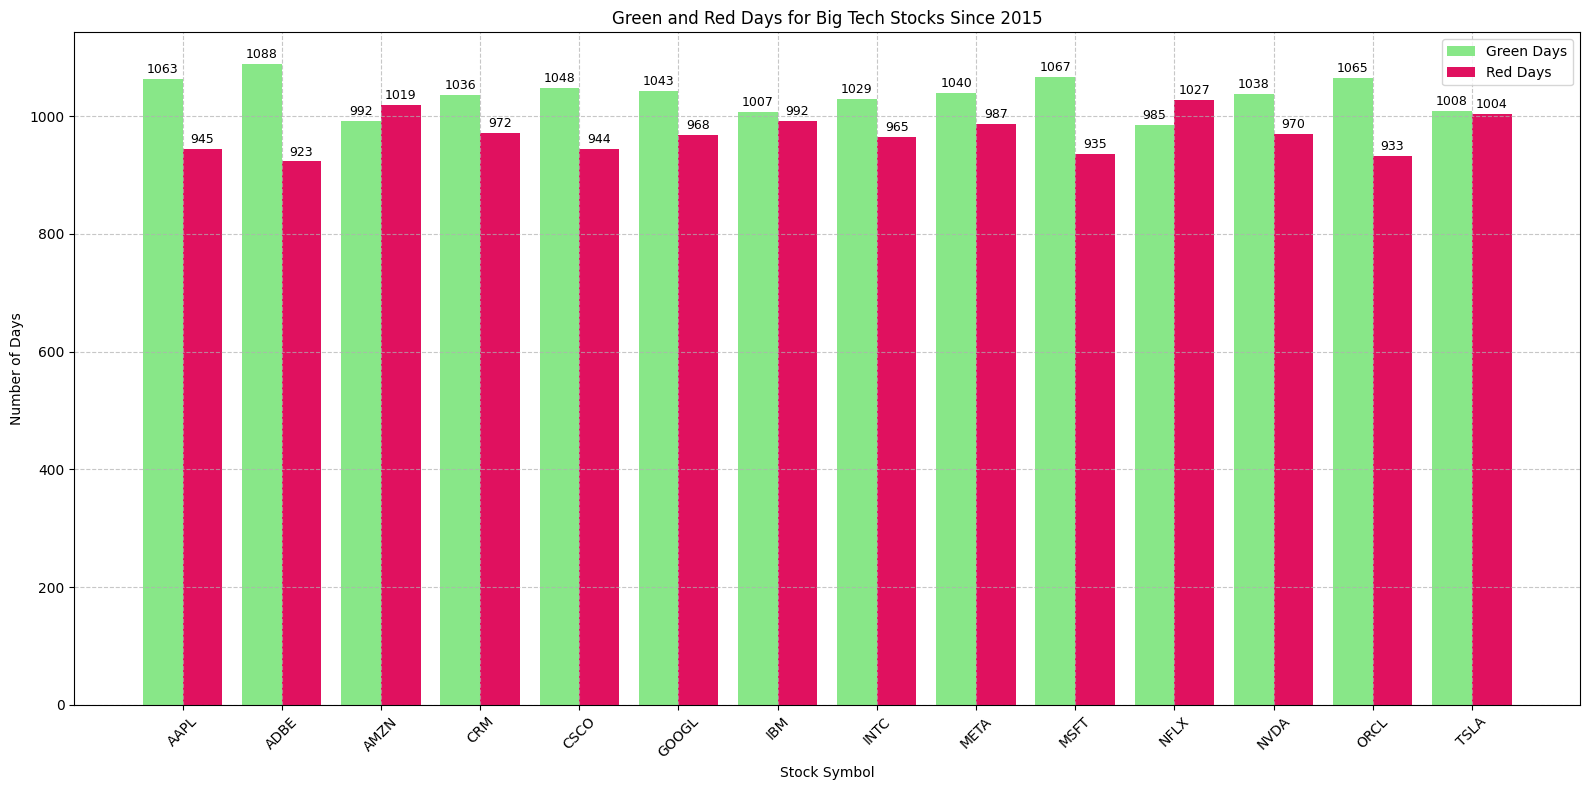

In [73]:
# Calculate green and red days for each stock
for ticker, stock_df in stock_dfs.items():
    stock_df['green_day'] = stock_df['close'] > stock_df['open']
    stock_df['red_day'] = stock_df['close'] < stock_df['open']
    stock_dfs[ticker] = stock_df

# Extract the number of green and red days for each stock
green_counts = [stock_dfs[ticker]['green_day'].sum() for ticker in tickers]
red_counts = [stock_dfs[ticker]['red_day'].sum() for ticker in tickers]

# Plot the number of green and red days for each stock
x = np.arange(len(tickers))
bar_width = 0.4

plt.figure(figsize=(16, 8))
plt.bar(x - bar_width / 2, green_counts, width=bar_width, color="#88E788", label="Green Days")
plt.bar(x + bar_width / 2, red_counts, width=bar_width, color="#E0115F", label="Red Days")

for i in range(len(tickers)):
    plt.text(x[i] - bar_width / 2, green_counts[i] + 5, str(green_counts[i]), ha="center", va="bottom", fontsize=9)
    plt.text(x[i] + bar_width / 2, red_counts[i] + 5, str(red_counts[i]), ha="center", va="bottom", fontsize=9)

plt.title("Green and Red Days for Big Tech Stocks Since 2015")
plt.xlabel("Stock Symbol")
plt.ylabel("Number of Days")
plt.xticks(x, tickers, rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

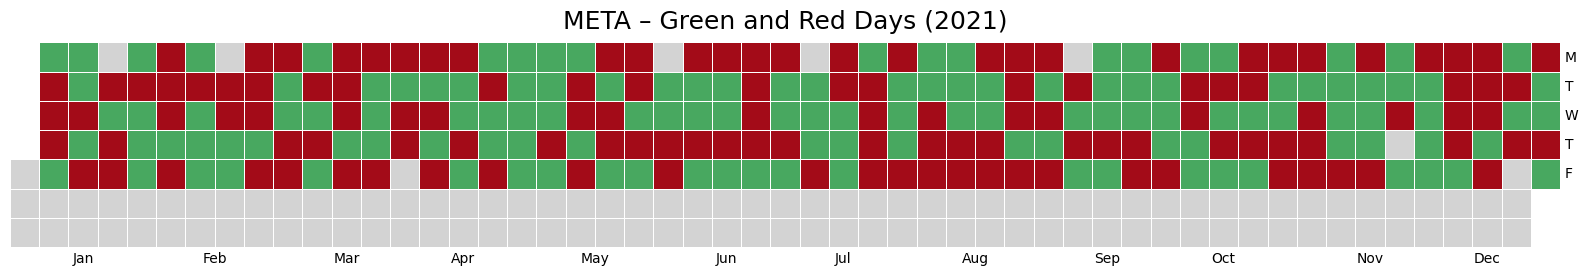

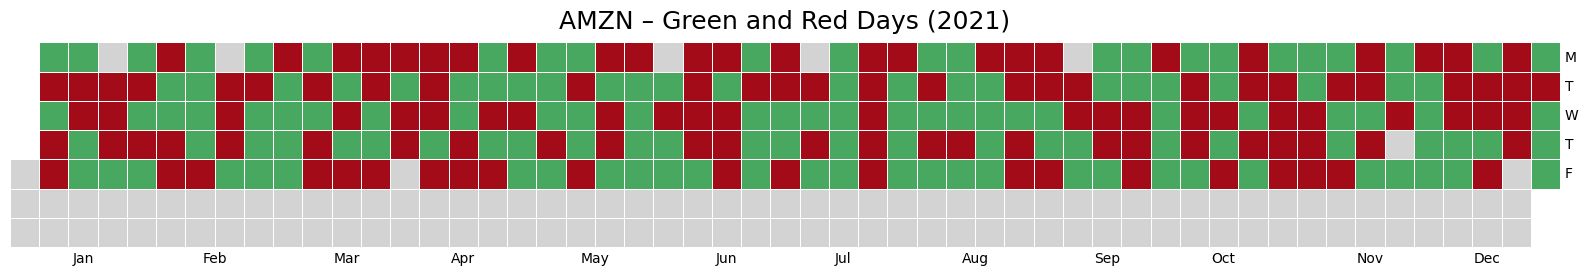

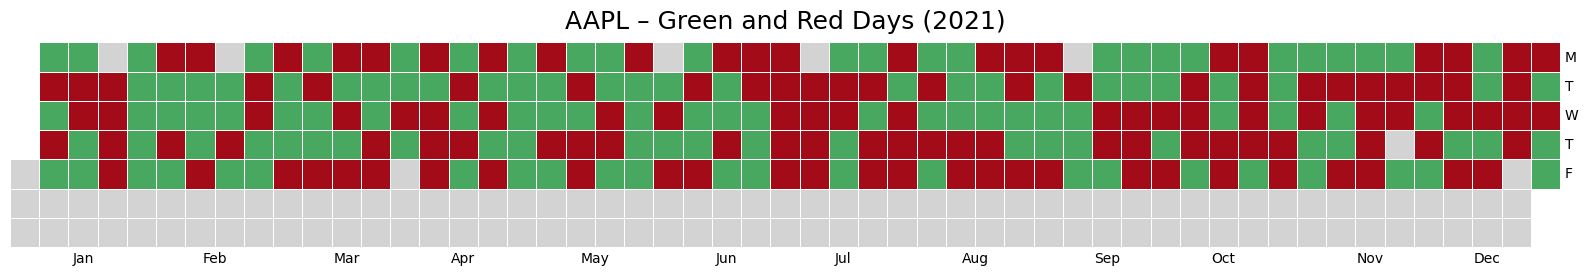

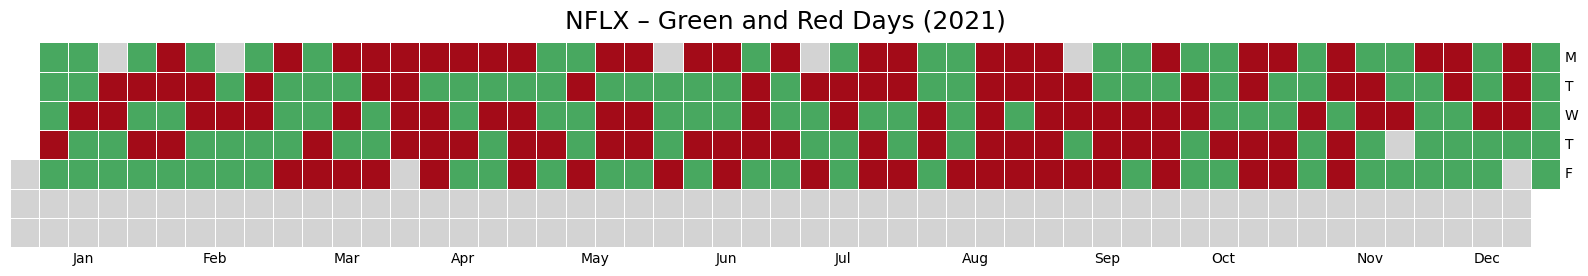

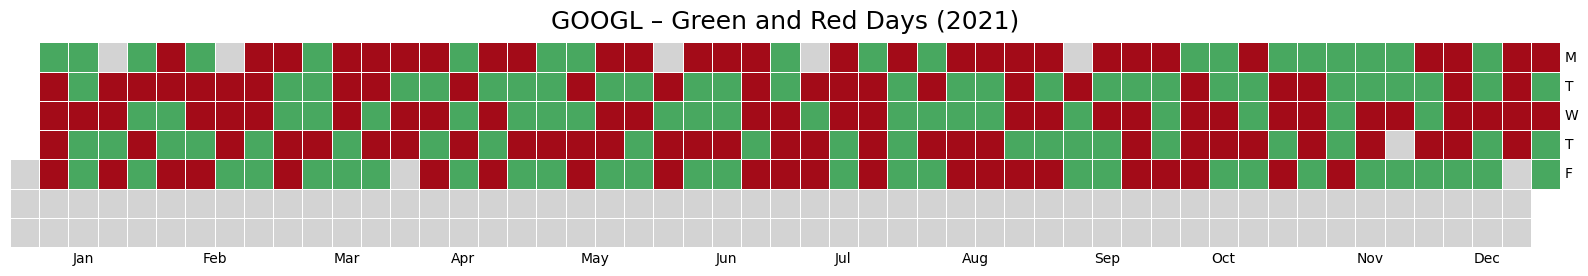

In [104]:
# FAANG tickers
faang_tickers = ["META", "AMZN", "AAPL", "NFLX", "GOOGL"]

custom_cmap = LinearSegmentedColormap.from_list(
    "green_red", ["#48A860", "#A30B18"], N=256
)

# Loop through each FAANG stock
for ticker in faang_tickers:
    stock_df = df[df["stock_symbol"] == ticker].copy()

    # Ensure 'date' is datetime and filter for 2020
    stock_df["date"] = pd.to_datetime(stock_df["date"])
    stock_df = stock_df[stock_df["date"].dt.year == 2021]

    # Create green/red indicator: 1 = green day, -1 = red day
    stock_df["green_red"] = stock_df.apply(
        lambda row: 1 if row["close"] > row["open"] else -1, axis=1
    )

    # Create Series with 'date' as index and green/red as values
    series = pd.Series(data=stock_df["green_red"].values, index=stock_df["date"])

    # Create figure with custom size
    fig, ax = plt.subplots(figsize=(20, 10))  # Adjust size as needed

    # Plot using calmap.yearplot with custom axis
    calmap.yearplot(
        series,
        year=2021,
        how=None,
        cmap=custom_cmap,
        vmin=-1,
        vmax=1,
        fillcolor="lightgray",
        linewidth=0.5,
        daylabels="MTWTF",
        ax=ax,
    )

    # Set title and adjust spacing
    ax.set_title(f"{ticker} – Green and Red Days (2021)", fontsize=18, pad=10)
    plt.subplots_adjust(top=0.90)

    plt.show()